In [944]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd

In [945]:
# np.random.seed(42)
# tf.keras.utils.set_random_seed(42)

In [946]:
# Check if a GPU is available for TensorFlow
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU is available:", gpus)
else:
    print("No GPU found.")

No GPU found.


In [947]:
import tensorflow as tf
print(f"TensorFlow Version: {tf.__version__}")
# Let's also check if TensorFlow was built with CUDA support
print(f"Built with CUDA: {tf.test.is_built_with_cuda()}")
# And try to list GPUs again, sometimes the initial check might be misleading
print(f"Available GPUs: {tf.config.list_physical_devices('GPU')}")

TensorFlow Version: 2.19.0
Built with CUDA: False
Available GPUs: []


In [948]:
df = pd.read_csv('data.csv')
df = df.sample(frac=1, random_state=np.random.randint(0,100)).reset_index(drop=True)

In [949]:
# display(df)

In [950]:
X = df[['area','school']].values
y = df['bought'].values

In [951]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_normalized = (X - X_mean) / X_std

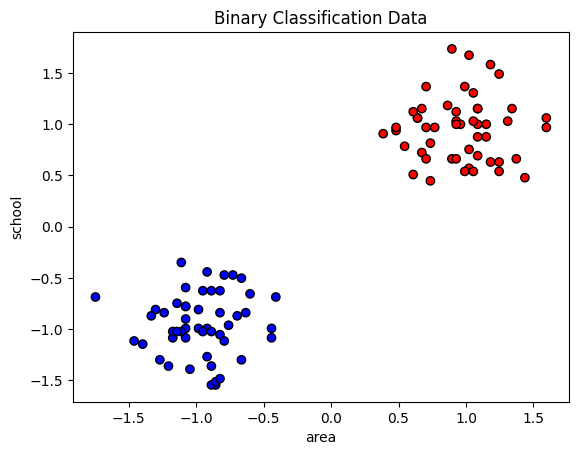

In [952]:
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.xlabel('area')
plt.ylabel('school')
plt.title('Binary Classification Data')
plt.show()

In [953]:
n = 80

X_train = X_normalized[0:n]
X_test = X_normalized[n:]

y_train = y[0:n]
y_test = y[n:]

In [954]:
print(X_train)
print(y_train)

[[ 1.08657185  0.99989385]
 [-0.75993173 -0.96248598]
 [-1.07829442 -0.99314817]
 [ 1.59595214  1.06121822]
 [-1.46032964 -1.11579691]
 [-0.91911307 -0.44122884]
 [ 0.64086409  1.06121822]
 [-0.8872768  -0.62520195]
 [ 0.60902782  0.50929889]
 [-0.91911307 -1.26910783]
 [ 1.34126199  1.15320477]
 [ 1.18208065  1.58247536]
 [-0.85544054 -1.5450675 ]
 [ 1.24575319  1.49048881]
 [ 0.70453662  1.36784007]
 [ 0.76820916  0.96923166]
 [ 0.9273905   1.03055603]
 [ 1.18208065  0.63194763]
 [-1.20563949 -1.36109439]
 [ 1.37309826  0.66260982]
 [-1.17380322 -1.08513472]
 [-1.14196695 -0.74785069]
 [ 1.02289931  0.75459637]
 [ 1.59595214  0.96923166]
 [-1.07829442 -0.90116161]
 [ 0.48168274  0.93856948]
 [-0.66442292 -1.29977002]
 [ 1.08657185  1.15320477]
 [ 0.70453662  0.96923166]
 [ 1.08657185  1.15320477]
 [-1.07829442 -0.77851287]
 [-1.17380322 -1.02381035]
 [-0.8872768  -1.36109439]
 [ 1.02289931  1.67446192]
 [ 0.67270035  1.15320477]
 [ 0.64086409  1.06121822]
 [ 1.08657185  0.87724511]
 

In [955]:
hidden_layer = "relu"
output_layer = "sigmoid"

model = Sequential([
    keras.Input(shape = (X.shape[1],)),
    Dense(units = 4, activation=hidden_layer),
    Dense(units = 2, activation=hidden_layer),
    Dense(units = 2, activation=hidden_layer),
    Dense(units = 1, activation=output_layer)]
    )

In [956]:
model.summary()

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_127 (Dense)               │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [957]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

print(model.layers[0].get_weights())

[array([[-0.20406604,  0.6192908 , -0.4307816 ,  0.22074127],
       [-0.7385063 , -0.7315526 ,  0.4912598 , -0.417845  ]],
      dtype=float32), array([0., 0., 0., 0.], dtype=float32)]


In [958]:
model.fit(
    X_train,y_train,
    epochs=100
)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6550 
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6510
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6469
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6425 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6378 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6331
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6283 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6233
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6181
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6126 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6071 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6016 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5962
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5906
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5850
Epoch 16/100
3/3 ━

In [959]:
print(model.layers[0].get_weights())

[array([[-0.28131604,  0.8898431 , -0.22231701,  0.17585732],
       [-0.8157464 , -0.43897706,  0.68845516, -0.4590064 ]],
      dtype=float32), array([ 0.07724956,  0.2842538 ,  0.20685272, -0.04423217], dtype=float32)]


In [960]:
from matplotlib.colors import ListedColormap

In [961]:
X_min, X_max = X_normalized[:, 0].min(), X_normalized[:, 0].max()
Y_min, Y_max = X_normalized[:, 1].min(), X_normalized[:, 1].max()
xx, yy = np.meshgrid(np.linspace(X_min, X_max, num=100), np.linspace(Y_min, Y_max, num=100))
X_range = np.c_[xx.ravel(), yy.ravel()]
y_predict = model.predict(X_range)
bicolor_map = ListedColormap(["#000000", "#FFFB26"])


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step


In [962]:
# print(X_test)
# print(y_test)

y_predict = np.where(y_predict.reshape(y_predict.shape[0])>0.5, 1, 0)
print(y_predict)

[0 0 0 ... 1 1 1]


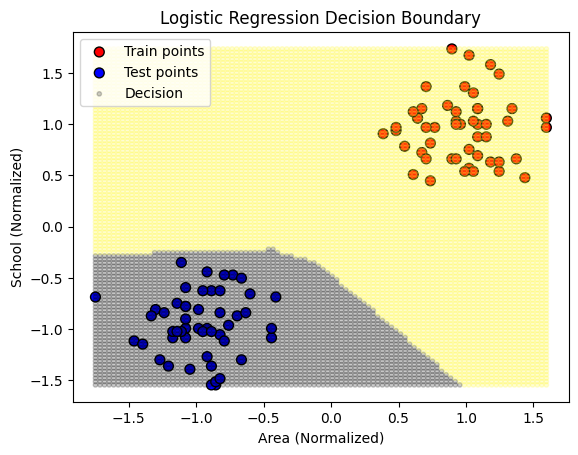

In [963]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolor='k', s=50, label='Train points')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', edgecolor='k', s=50, label='Test points')

plt.scatter(X_range[:, 0], X_range[:, 1], c=(y_predict > 0.5).astype(int), cmap=bicolor_map, alpha=0.2, marker='o', s=10, label='Decision')

plt.xlabel('Area (Normalized)')
plt.ylabel('School (Normalized)')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()